In [1]:
#installing all the libraries for analysis and presentation
!pip install pandas 
!pip install pymc
!pip install numpy
!pip install scikit-learn
!pip install --upgrade arviz 
!pip install matplotlib seaborn


In [2]:
#Importing Core Libraries for Analysis, Data Handling, and Evaluation
import pymc as pm                         #for Probabilistic programming for Bayesian modeling
import pandas as pd                      # for Data manipulation and analysis
import numpy as np                       # for Numerical operations and array handling
import matplotlib.pyplot as plt          # for Visualization and plotting
import arviz as az                       # for Diagnostics and visualization of Bayesian inference
from sklearn.preprocessing import StandardScaler  # Feature standardization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation metrics
import seaborn as sns


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [3]:
#Loading ddata
df = pd.read_excel("Sales_data.xlsx", sheet_name="OutletA")

In [4]:
df.head()

,date,Outlet,sales_in_crates,promotion_done,holidays,season
0,2022-01-01,OutletA,1546,0,1,0
1,2022-02-01,OutletA,1538,0,0,0
2,2022-03-01,OutletA,1569,0,1,0
3,2022-04-01,OutletA,1649,0,1,1
4,2022-05-01,OutletA,1708,1,0,1


In [5]:
#preprocessing data

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
df['season'] = df['month'].isin([4, 5, 6, 7, 8]).astype(int)

features = ['promotion_done', 'holidays', 'season', 'sin_month', 'cos_month']
X = df[features]
y = df['sales_in_crates']
# Spliting data into training and test sets
train_df = df.iloc[:-3]
test_df = df.iloc[-3:]
X_train = train_df[features]
y_train = train_df['sales_in_crates']
X_test = test_df[features]
y_test = test_df['sales_in_crates']
# Scale predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Quick look
display(df.head())
print(df[["sales_in_crates", "promotion_done", "holidays", "season"]].describe())

,date,Outlet,sales_in_crates,promotion_done,holidays,season,month,sin_month,cos_month
0,2022-01-01,OutletA,1546,0,1,0,1,0.500000,8.660254e-01
1,2022-02-01,OutletA,1538,0,0,0,2,0.866025,5.000000e-01
2,2022-03-01,OutletA,1569,0,1,0,3,1.000000,6.123234e-17
3,2022-04-01,OutletA,1649,0,1,1,4,0.866025,-5.000000e-01
4,2022-05-01,OutletA,1708,1,0,1,5,0.500000,-8.660254e-01


       sales_in_crates  promotion_done   holidays     season
count        36.000000       36.000000  36.000000  36.000000
mean       1587.888889        0.305556   0.166667   0.416667
std          72.242361        0.467177   0.377964   0.500000
min        1464.000000        0.000000   0.000000   0.000000
25%        1529.250000        0.000000   0.000000   0.000000
50%        1590.000000        0.000000   0.000000   0.000000
75%        1622.000000        1.000000   0.000000   1.000000
max        1758.000000        1.000000   1.000000   1.000000


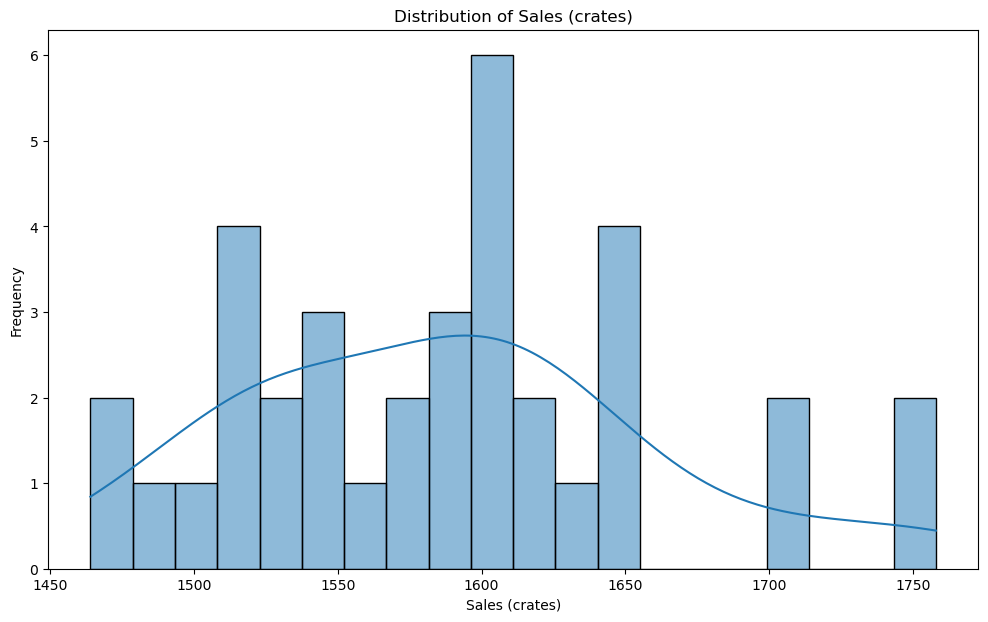

In [7]:
# 1) Distribution of sales
plt.figure(figsize=(12,7))
sns.histplot(df['sales_in_crates'], kde=True, bins=20)
plt.title("Distribution of Sales (crates)")
plt.xlabel("Sales (crates)")
plt.ylabel("Frequency")
plt.show()

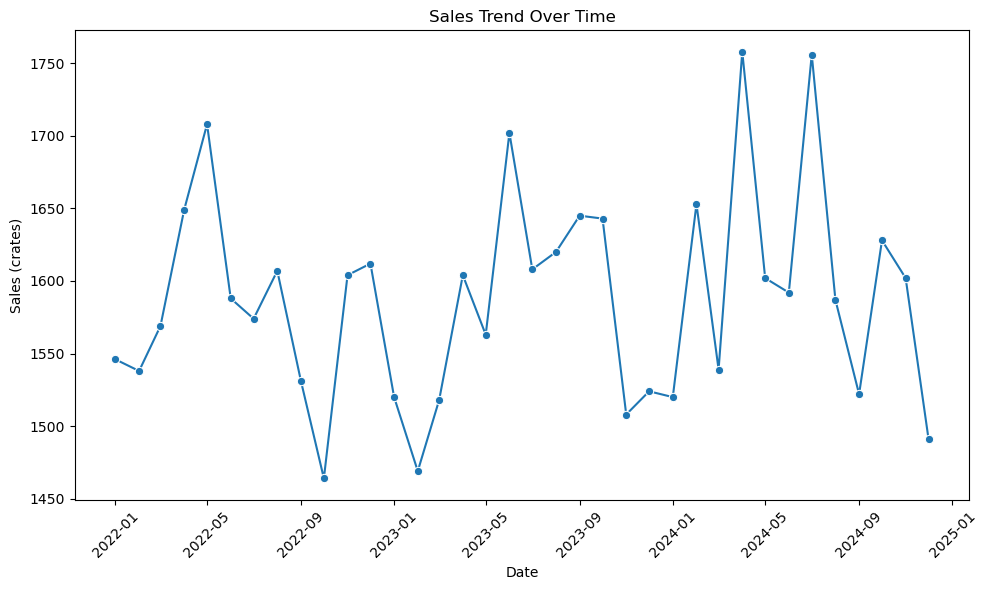

In [8]:
# 2) Sales trend over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='sales_in_crates', marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales (crates)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

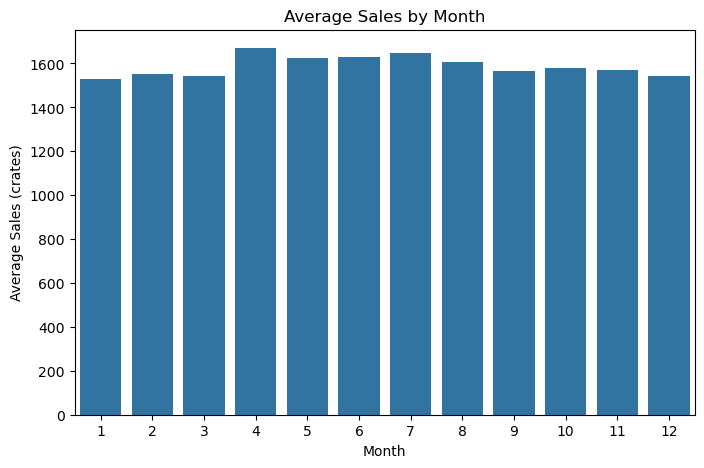

In [9]:
# 3) Average sales by month (to illustrate seasonality)
monthly_mean = df.groupby('month')['sales_in_crates'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=monthly_mean, x='month', y='sales_in_crates')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales (crates)")
plt.show()

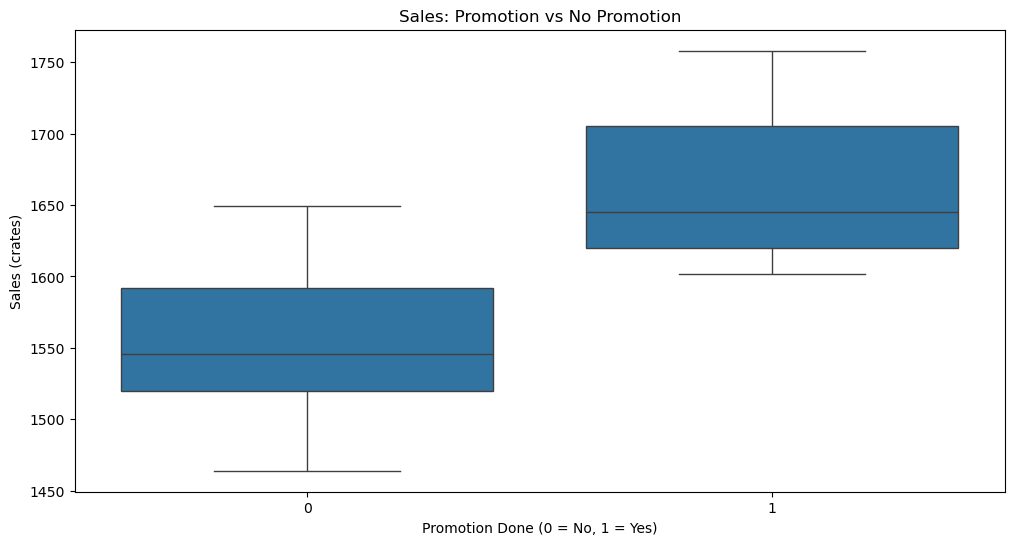

In [10]:
# 4) Promotion effect (boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='promotion_done', y='sales_in_crates')
plt.title("Sales: Promotion vs No Promotion")
plt.xlabel("Promotion Done (0 = No, 1 = Yes)")
plt.ylabel("Sales (crates)")
plt.show()

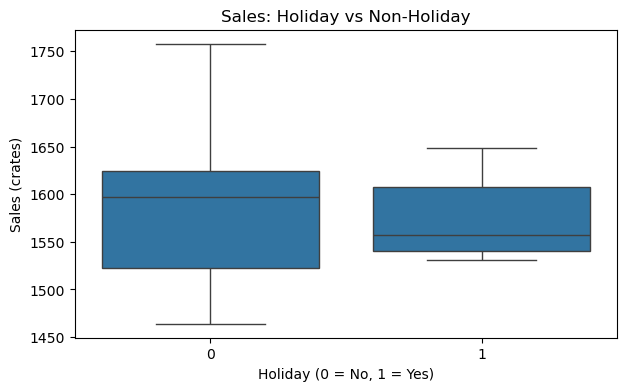

In [11]:
# 5) Holiday effect (boxplot)
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='holidays', y='sales_in_crates')
plt.title("Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Sales (crates)")
plt.show()


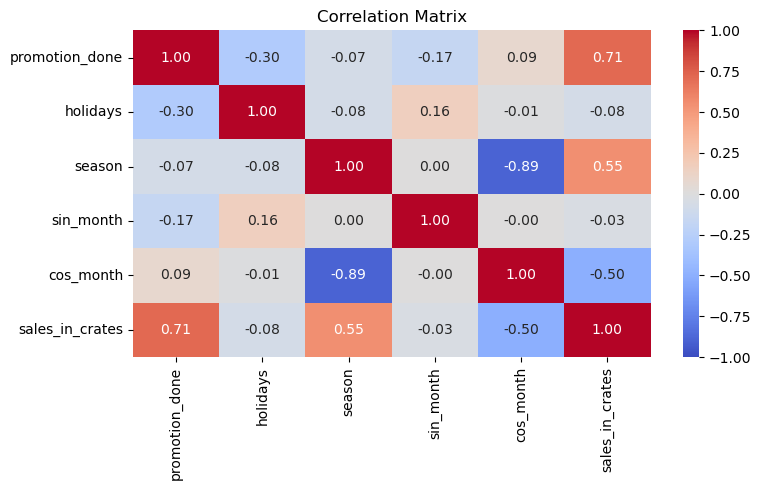

In [12]:

# 6) Correlation matrix for features + target
corr_df = df[features + ['sales_in_crates']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\pymc\data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_promo, beta_holiday, beta_season, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32756 seconds.


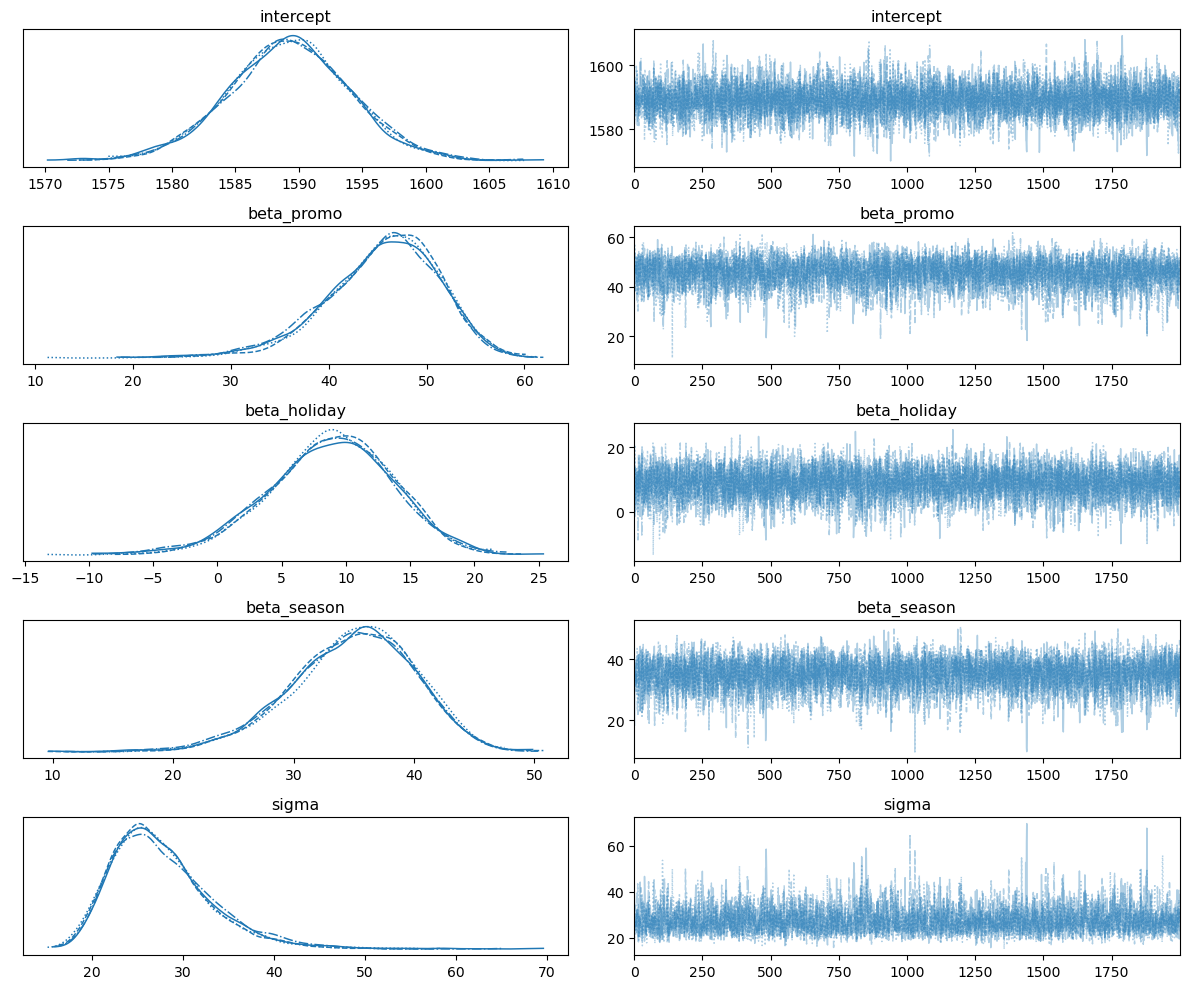

                 mean    sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept     1589.24  4.87  1579.94  1598.36       0.06     0.07   6005.04   
beta_promo      45.51  5.76    34.69    55.73       0.10     0.08   3829.25   
beta_holiday     8.81  4.79    -0.28    17.58       0.07     0.06   5568.03   
beta_season     34.90  5.14    25.21    44.17       0.08     0.07   4568.48   
sigma           27.58  5.52    18.33    37.56       0.10     0.10   3491.57   

              ess_tail  r_hat  
intercept      4870.33    1.0  
beta_promo     3865.35    1.0  
beta_holiday   4871.94    1.0  
beta_season    4433.24    1.0  
sigma          4106.12    1.0  


Sampling: [y_obs]


Output()

C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


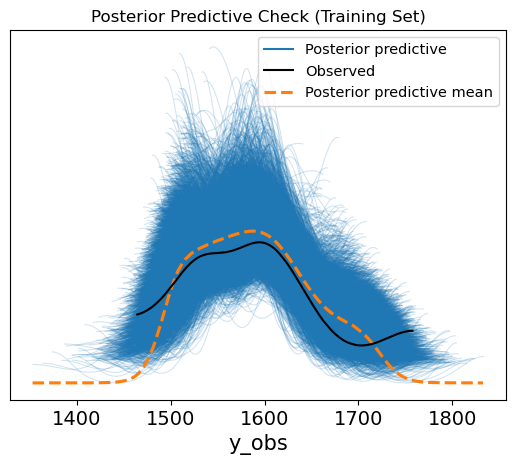

Sampling: []


Output()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Test set predictions vs actual:
        Date  Actual    Predicted
0 2024-10-01    1628  1627.543314
1 2024-11-01    1602  1627.543314
2 2024-12-01    1491  1525.367640

Performance Metrics:
MAE: 20.12
RMSE: 24.72
R²: 0.83


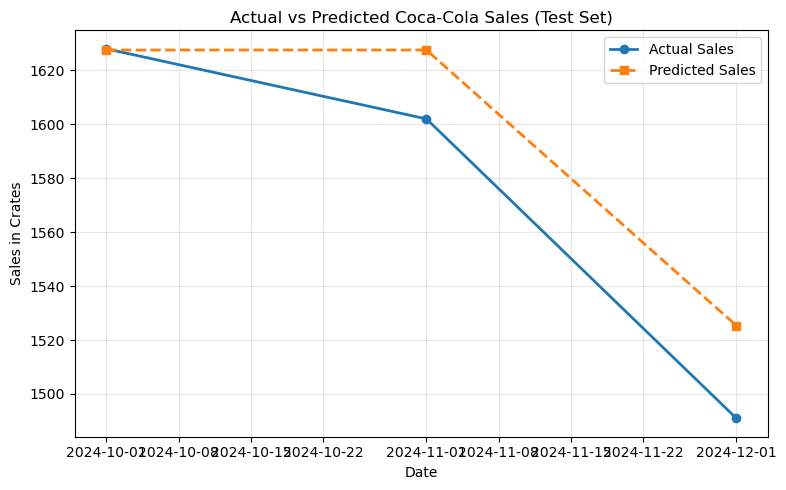

In [13]:
# Building the Bayesian linear regression model
with pm.Model() as model:
    # Mutable data container for predictor variables (used to update inputs during forecasting)
    X_shared = pm.MutableData("X", X_train_scaled)

    # Prior distribution for the intercept term (baseline sales level)
    intercept = pm.Normal("intercept", mu=1500, sigma=500)

    # Prior distributions for the regression coefficients (effect sizes of predictors)
    beta_promo = pm.Normal("beta_promo", mu=0, sigma=10)
    beta_holiday = pm.Normal("beta_holiday", mu=0, sigma=10)
    beta_season = pm.Normal("beta_season", mu=0, sigma=10)

    # Prior for the standard deviation of residuals (model uncertainty)
    sigma = pm.HalfNormal("sigma", sigma=100)

    # Expected value of the outcome variable (predicted sales)
    mu = pm.Deterministic(
        "mu",
        intercept
        + beta_promo * X_shared[:, 0]
        + beta_holiday * X_shared[:, 1]
        + beta_season * X_shared[:, 2]
    )  # Linear combination of predictors

    # Likelihood function for observed data
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)

    # Drawing posterior samples using MCMC
    trace = pm.sample(
        2000,              # Number of posterior samples
        tune=1000,         # Number of tuning (burn-in) steps
        target_accept=0.95,# Target acceptance rate for sampler stability
        chains=4,          # Number of MCMC chains
        cores=4,           # CPU cores used for parallel sampling
        return_inferencedata=True
    )

# --- Convergence Diagnostics ---
# Using traceplots to check if MCMC chains have mixed well (no divergence, good overlap) focusing on key parameters.

az.plot_trace(
    trace,
    var_names=["intercept", "beta_promo", "beta_holiday", "beta_season", "sigma"],
    compact=True
)
plt.tight_layout()
plt.show()

# --- Posterior Summary ---
print(
    az.summary(
        trace,
        var_names=["intercept", "beta_promo", "beta_holiday", "beta_season", "sigma"],
        round_to=2
    )
)

# --- Posterior Predictive Check (Training Set) ---
# Compare simulated (model-predicted) sales vs actual sales to assess model fit

with model:
    ppc_train = pm.sample_posterior_predictive(trace, random_seed=42)

az.plot_ppc(ppc_train)
plt.title("Posterior Predictive Check (Training Set)")
plt.show()

# Predicting on test set
with model:
    pm.set_data({"X": X_test_scaled})
    ppc_test = pm.sample_posterior_predictive(trace, var_names=["mu"], random_seed=42)

mu_test_samples = ppc_test.posterior_predictive["mu"]
mu_test_mean = mu_test_samples.stack(sample=("chain", "draw")).mean("sample").values

# --- Performance metrics ---
test_metrics = {
    "MAE": mean_absolute_error(y_test, mu_test_mean),
    "RMSE": mean_squared_error(y_test, mu_test_mean, squared=False),
    "R²": r2_score(y_test, mu_test_mean)
}

print("\nTest set predictions vs actual:")
print(pd.DataFrame({
    "Date": test_df["date"].values,
    "Actual": y_test.values,
    "Predicted": mu_test_mean
}))

print("\nPerformance Metrics:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.2f}")

# --- Visual Comparison: Actual vs Predicted Sales ---
plt.figure(figsize=(8, 5))
plt.plot(test_df["date"], y_test.values, marker='o', label="Actual Sales", linewidth=2)
plt.plot(test_df["date"], mu_test_mean, marker='s', linestyle='--', label="Predicted Sales", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Sales in Crates")
plt.title("Actual vs Predicted Coca-Cola Sales (Test Set)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
# Forecasting sales for the next 12 months ---

# Defining the forecasting horizon: number of future months to be predicted
future_months = 12


last_date = df['date'].max()


future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')

# Creating a new DataFrame for the future periods with relevant predictor variables
# Here, 'promotion_done' and 'holidays' are specified as assumed future conditions
future_df = pd.DataFrame({
    'date': future_dates,
    'promotion_done': [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],  # Assumed promotion schedule
    'holidays': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]          # Assumed holiday indicators
})

future_df['month'] = future_df['date'].dt.month
future_df['season'] = future_df['month'].isin([4, 5, 6, 7, 8]).astype(int)
future_df['sin_month'] = np.sin(2 * np.pi * future_df['month'] / 12)
future_df['cos_month'] = np.cos(2 * np.pi * future_df['month'] / 12)

X_future = future_df[features]
X_future_scaled = scaler.transform(X_future)

with model:
    pm.set_data({"X": X_future_scaled})
    future_preds = pm.sample_posterior_predictive(trace, var_names=["mu"], random_seed=42)
#Forecast summary statistics 
mu_samples = future_preds.posterior_predictive["mu"]
mu_samples_combined = mu_samples.stack(sample=("chain", "draw")).transpose("sample", "mu_dim_0").values
forecast_samples = pd.DataFrame(mu_samples_combined, columns=future_df["date"].dt.strftime("%Y-%m"))

future_df["median"] = np.median(mu_samples_combined, axis=0)
future_df["q5"] = np.quantile(mu_samples_combined, 0.05, axis=0)
future_df["q95"] = np.quantile(mu_samples_combined, 0.95, axis=0)
future_df["mean"] = forecast_samples.mean(axis=0).values
future_df["std"] = forecast_samples.std(axis=0).values

Sampling: []


Output()

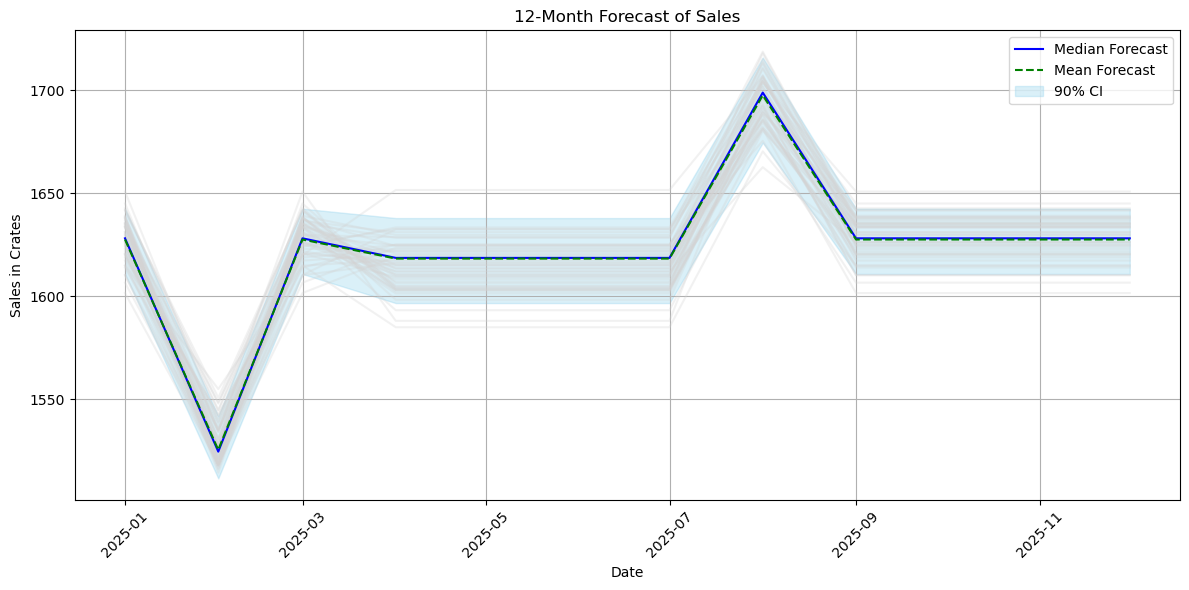

In [15]:
#Ploting forecast with uncertainty
plt.figure(figsize=(12, 6))
for i in range(min(50, forecast_samples.shape[0])):
    plt.plot(future_df["date"], forecast_samples.iloc[i], color="lightgray", alpha=0.3)

plt.plot(future_df["date"], future_df["median"], label="Median Forecast", color="blue")
plt.plot(future_df["date"], future_df["mean"], label="Mean Forecast", color="green", linestyle="--")
plt.fill_between(future_df["date"], future_df["q5"], future_df["q95"], color="skyblue", alpha=0.3, label="90% CI")

plt.xticks(rotation=45)
plt.title("12-Month Forecast of Sales")
plt.xlabel("Date")
plt.ylabel("Sales in Crates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
